Veena Kumar
Challenge 2
10/10/16

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!conda install beautifulsoup4 --yes
from bs4 import BeautifulSoup
!conda install requests --yes
import requests

%matplotlib inline

Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/veenakumar/anaconda2:
#
beautifulsoup4            4.5.1                    py27_0  
Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/veenakumar/anaconda2:
#
requests                  2.11.1                   py27_0  


In [10]:
movie_data = pd.read_csv('/Users/veenakumar/Desktop/Projects/Luther/Luther_Data_Final.csv')

In [14]:
#A column called 'Unnamed: 0' comes in, so first step dropping that.
movie_data = movie_data.drop('Unnamed: 0', 1)
#Converting gross values from float to int (easier to visualize)
movie_data['Domestic_Total'] = map(int,movie_data['Domestic_Total'])
movie_data['Foreign'] = map(int,movie_data['Foreign'])
movie_data['Release_Yr'] = map(str,movie_data['Release_Yr'])

In [18]:
movie_data = movie_data.drop('Distributor',axis=1)

In [112]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
Distributor_Parsed    1700 non-null object
Runtime               1700 non-null int64
Domestic_Total        1700 non-null int64
Production_Budget     1700 non-null int64
Release_Date          1700 non-null object
Release_Month         1700 non-null float64
Season                1700 non-null object
Release_Yr            1700 non-null object
Title                 1699 non-null object
Foreign               1700 non-null int64
Total_Gross           1700 non-null float64
Domestic_Percent      1690 non-null float64
Foreign_Percent       1690 non-null float64
Genre                 1700 non-null object
Genre_Adventure       1700 non-null int64
Genre_SciFi           1700 non-null int64
Genre_Comedy          1700 non-null int64
Genre_Drama           1700 non-null int64
Genre_Romance         1700 non-null int64
Genre_Horror          1700 non-null int64
Genre_Documentary     1700 non-null int

# Challenge 2.1

In [20]:
#Creating df with Domestic Total Gross(dtg) and Time
dtg_time = movie_data[['Domestic_Total','Release_Yr']]
dtg_time_plot = dtg_time.groupby(['Release_Yr']).sum().reset_index()
dtg_time_plot = dtg_time_plot.set_index('Release_Yr')
dtg_time_plot = dtg_time_plot.drop('2016',0)

In [21]:
dtg_time_plot

,Domestic_Total
Release_Yr,
2000,11167998780
2001,11229907922
2002,11940724175
2003,11644786949
2004,11607915339
2005,10353394138
2006,10368322249
2007,10711277900
2008,10279665404


In [22]:
import seaborn as sns

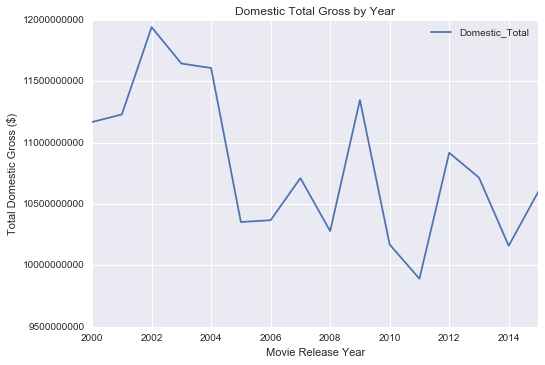

In [23]:
dtg_time_plot.plot()
plt.title('Domestic Total Gross by Year')
plt.xlabel('Movie Release Year')
plt.ylabel('Total Domestic Gross ($)')
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()

# Challenge 2.2

In [24]:
#Creating df for just runtime and domestic total.
dtg_rt = movie_data[['Runtime','Domestic_Total']]

In [83]:
bins = [0, 30, 60, 90, 120,150,180,260]

In [84]:
group_names = ['0-30','31-60','61-90','91-120','121-150','151-180','180+']

In [85]:
categories = pd.cut(dtg_rt['Runtime'], bins, labels=group_names)
# df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)

In [86]:
dtg_rt['Binned'] = categories

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [104]:
test = dtg_rt[['Binned','Domestic_Total']]

In [107]:
test2 = test.groupby(['Binned']).sum()

In [108]:
test2

,Domestic_Total
Binned,
0-30,NaN
31-60,2.988967e+07
61-90,2.019924e+10
91-120,9.681403e+10
121-150,4.880863e+10
151-180,1.051375e+10
180+,1.234365e+09


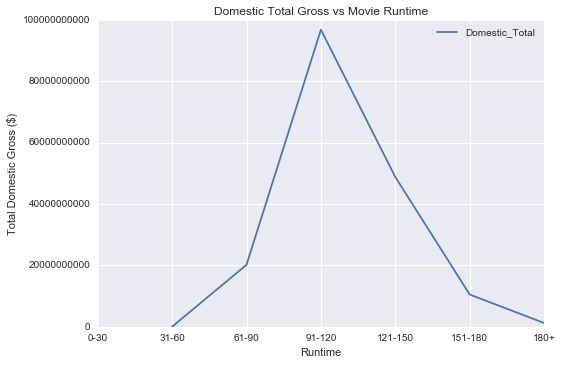

In [109]:
test2.plot()
plt.title('Domestic Total Gross vs Movie Runtime')
plt.xlabel('Runtime')
plt.ylabel('Total Domestic Gross ($)')
plt.ticklabel_format(style = 'plain', axis='y')

# Challenge 2.3

In [113]:
rating = movie_data[['MPAA_Rating','Domestic_Total','Runtime']]

In [114]:
rating.head()

,MPAA_Rating,Domestic_Total,Runtime
0,PG-13,114321891,109
1,PG-13,64467571,100
2,PG,57493942,122
3,G,107578449,104
4,PG-13,79811099,97


In [117]:
rating_counts = rating['MPAA_Rating'].value_counts()

In [121]:
rating.groupby(['MPAA_Rating']).mean()

,Domestic_Total,Runtime
MPAA_Rating,,
G,1.230874e+08,91.140625
PG,1.193558e+08,100.643312
PG-13,1.158188e+08,112.533502
R,7.689778e+07,111.861742
Unrated,9.963223e+06,42.000000


# Challenge 2.4

In [122]:
dtg_yr = movie_data[['MPAA_Rating','Domestic_Total','Release_Yr']]

In [127]:
test = dtg_yr.groupby(['Release_Yr']).mean()

In [130]:
test2 = dtg_yr.groupby(['MPAA_Rating']).mean()

In [141]:
dtg_yr.sort(columns='Release_Yr',inplace=True)

/Users/veenakumar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/veenakumar/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  na_position=na_position)


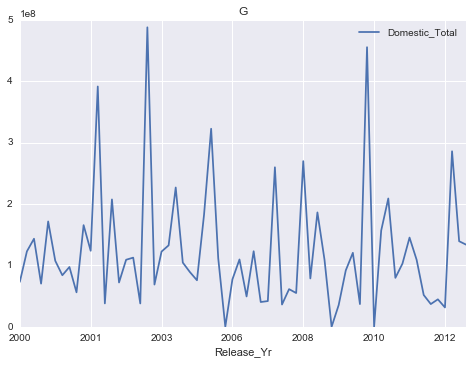

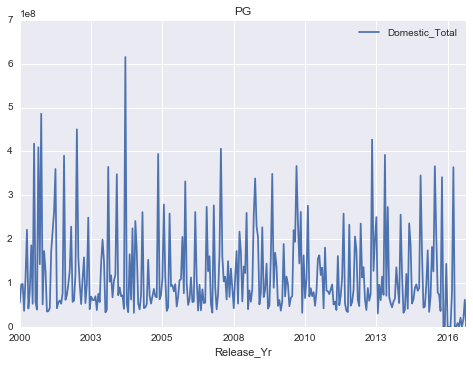

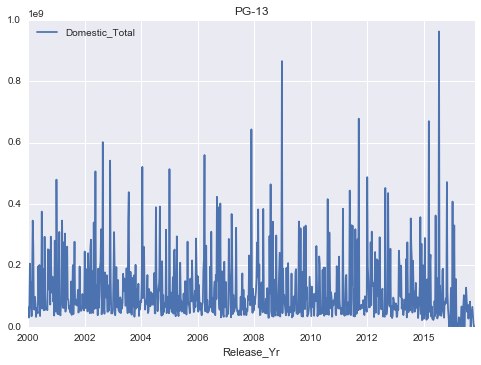

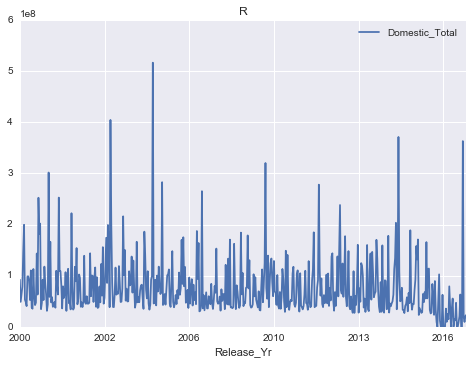

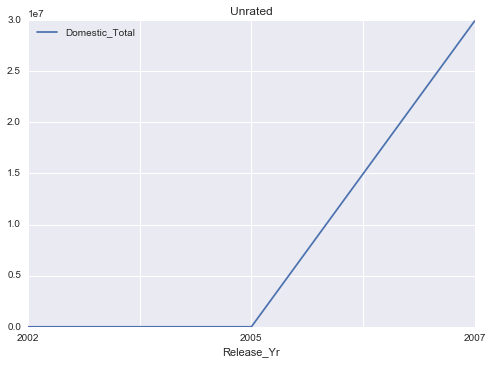

In [147]:
#Plotting subplots for every rating.
for i, group in dtg_yr.groupby(['MPAA_Rating']):
    plt.figure()
    group.plot(x='Release_Yr', y='Domestic_Total', title=str(i));

# Challenge 2.5

In [ ]:
# What director in your dataset has the highest gross per movie?

In [153]:
movies2 = pd.read_csv('/Users/veenakumar/ds/metis/metisgh/sf16_ds4/challenges/02-pandas/2013_movies.csv')

In [187]:
director = movies2.groupby(['Director'])

In [188]:
director.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,10/4/13 0:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,6/21/13 0:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,12/13/13 0:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,5/24/13 0:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,3/8/13 0:00


In [178]:
director.sort_values('DomesticTotalGross',ascending=False,inplace=True)

In [183]:
director.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,10/4/13 0:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,6/21/13 0:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,12/13/13 0:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,5/24/13 0:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,3/8/13 0:00


In [ ]:
#Answer: Director with most domestic gross is Francis Lawrence.

# Challenge 2.6

In [ ]:
# Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

# Title of graph should include: Mean Domestic Total Gross by Month in 2013

# Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [230]:
movie_data['Release_Month'] = map(float,movie_data['Release_Month'])

In [231]:
months = movie_data.groupby(['Release_Month']).mean()

In [232]:
months_dtg = months[['Domestic_Total']]

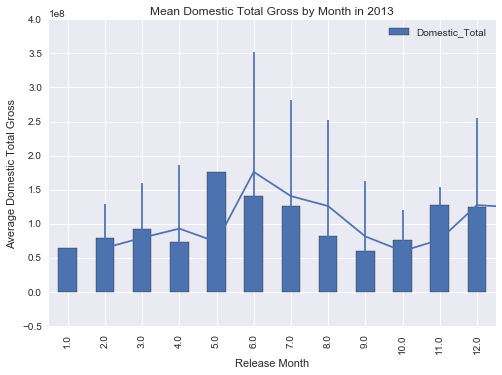

In [261]:
x = months_dtg.index
y = months_dtg['Domestic_Total']
std = months_dtg.std
std_test = (6.471216e+07,7.961438e+07,9.304103e+07,7.359205e+07,1.762346e+08,1.407337e+08,1.261067e+08,8.157909e+07,6.011617e+07,7.674711e+07,1.275128e+08,1.244083e+08)
a = months_dtg.plot.bar()
plt.errorbar(x,y,yerr=std_test)
a.set_xlabel('Release Month')
a.set_ylabel('Average Domestic Total Gross')
plt.title('Mean Domestic Total Gross by Month in 2013')

In [260]:
std

<bound method DataFrame.std of                Domestic_Total
Release_Month                
1.0              6.471216e+07
2.0              7.961438e+07
3.0              9.304103e+07
4.0              7.359205e+07
5.0              1.762346e+08
6.0              1.407337e+08
7.0              1.261067e+08
8.0              8.157909e+07
9.0              6.011617e+07
10.0             7.674711e+07
11.0             1.275128e+08
12.0             1.244083e+08>